In [63]:
import pandas as pd
import re
from os import makedirs
from os.path import join
from plotnine import *

In [54]:
def parse_temp_log(log_f,
                  max_z=50,
                  pattern="Temp1 (.+?), Z (.+?), N (\d)"):
    """
    parses log files. 
    
    Takes open filehandle.
    
    Returns Pandas DataFrame object, with columns indicating Z, Temp, and replicate number.
    For Z, subtracts indicated Z value from max_z parameter to get the Z position relative
    to the starting point.
    """
    temp = []
    z = []
    rep = []

    for line in log_f:
        match = re.search(pattern, line)
        if match:
            temp.append(float(match.group(1)))
            z.append(max_z - float(match.group(2)))
            rep.append(int(match.group(3)))

    profile_df = pd.DataFrame.from_dict({"Z": z, "Temp": temp, "N": rep})
    
    return(profile_df)

In [48]:
log_fp = '../Logs/20210317_V6-cu-fan.txt'

In [49]:
with open(log_fp, 'r') as log_f:
    profile_df = parse_temp_log(log_f)

In [58]:
profile_plot = (ggplot(profile_df, aes('Temp', 'Z', color='Temp', group='factor(N)'))
 + geom_point()
 + geom_line()
 + theme_bw()
 + ggtitle('V6 heatsink, Stainless heatbreak, Cu heat block'))

/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


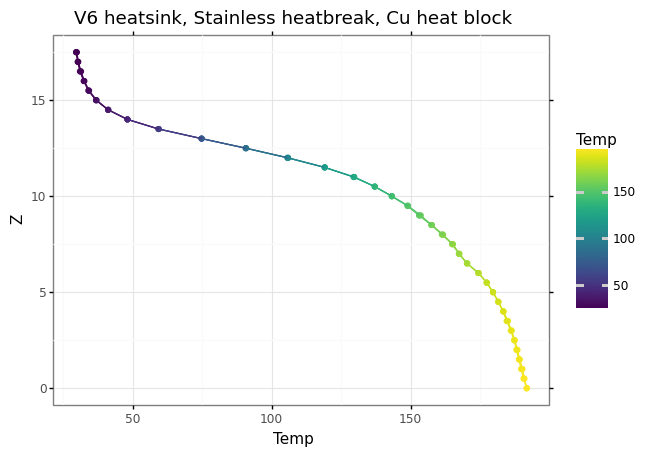

<ggplot: (-9223372036542307040)>

In [59]:
profile_plot

In [64]:
plot_dir = '../Plots/Hotends'
makedirs(plot_dir, exist_ok=True)

In [65]:
profile_plot.save(filename=join(plot_dir, 'heatbreak_v6_stainless_cu.png'),
                  format='png',
                  width=6,
                  height=4)

/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6 x 4 in image.
  from_inches(height, units), units))
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: ../Plots/Hotends/heatbreak_v6_stainless_cu.png
  warn('Filename: {}'.format(filename))
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
/Users/jgs286/miniconda3/envs/py3/lib/python3.7/site-packages/plotnine/u